In [1]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [40]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1903Tilapia.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 172800 #s
wetweight = 446.3 #g
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1903Tilapia.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

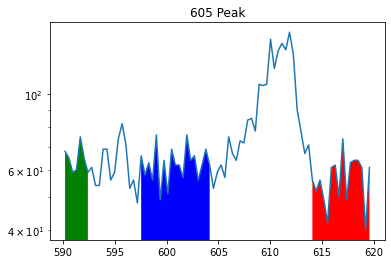

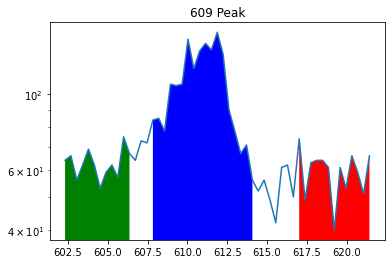

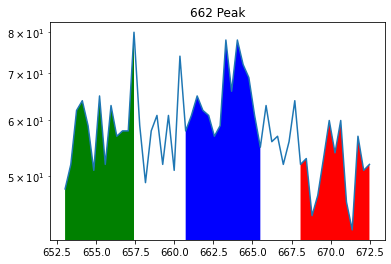

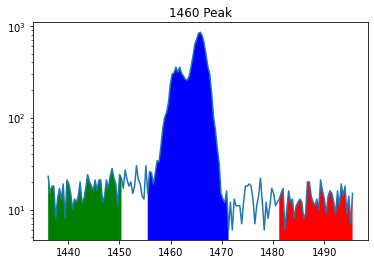

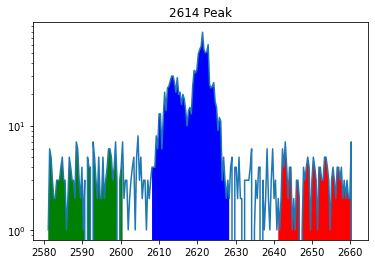

In [41]:
roi.set_sideband(605, 3, [[-4, -3], [-1.5, 0.9], [4, 6]])
roi.set_sideband(609, 5, [[-2, -1], [-0.85, 0.5], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.5, 0.6], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.7, 0.4], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.65, 0.4], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [33]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 415.7035624833569
bg peak counts 380.03372993666954
signal bg 1264.4999999999998
signal peak 1071.0
background spec sidebands 692.7281498319292
bg peak counts 1426.126576025502
signal bg 761.5000000000002
signal peak 1885.9999999999995
background spec sidebands 630.3892836054756
bg peak counts 688.06106893797
signal bg 720.0
signal peak 902.0000000000001
background spec sidebands 587.7188297178495
bg peak counts 2312.871945877731
signal bg 605.5
signal peak 10817.0
background spec sidebands 174.68217060246917
bg peak counts 1268.112551472887
signal bg 178.0
signal peak 1236.0000000000002
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]
[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[-0.0009133690246140764, 0.002263319292861265, 0.00071949

In [5]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: -0.00034359354172531863 ± 3.868141251462148e-05 Bq/g (wet weight)
Specific activity at 609 keV: 0.0002568732466859019 ± 4.348059210064858e-05 Bq/g (wet weight)
Specific activity at 662 keV: 8.5503888826984e-05 ± 3.3644319842020516e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.010462372641989095 ± 0.0001448573497503256 Bq/g (wet weight)
Specific activity at 2614 keV: -9.779394619888654e-05 ± 0.00014150960848361685 Bq/g (wet weight)
